In [1]:
# Importing packages needed for the analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading data files 

enrollment_with_race = pd.read_csv("Master_Race_Enrollment.csv",parse_dates = ["DATE OF REPORT"])

enrollment_with_eco_status = pd.read_csv("Master_Eco_Dis_Enrollment.csv", parse_dates = ["DATE OF REPORT"])

enrollment_with_gender = pd.read_csv("Master_enroll_gender.csv", parse_dates = ["DATE OF REPORT"])


In [3]:
enrollment_with_race.head()

,SCHOOL YEAR,DATE OF REPORT,COUNTY,STATE DISTRICT ID,DISTRICT NAME,SUBGROUP CODE,Race,GRADE 9,GRADE 10,GRADE 11,GRADE 12
0,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,4,American Indian/Alaska Native,14,17,11,65
1,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,5,Black,437,423,415,1476
2,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,6,Hispanic,470,388,431,1764
3,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,7,Asian/Pacific Islander,44,58,93,347
4,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,8,White,86,80,131,581


In [4]:
enroll_race = pd.DataFrame(enrollment_with_race.groupby(["COUNTY" , "Race", "SCHOOL YEAR"])[["GRADE 9" , "GRADE 10", "GRADE 11", "GRADE 12"]].sum())
enroll_race

GRADE 9  GRADE 10  \
COUNTY   Race                          SCHOOL YEAR                      
BRONX    American Indian/Alaska Native 2016-17          105       138   
                                       2017-18          122       115   
                                       2018-19          164       142   
                                       2019-20          151       171   
                                       2020-21          116       149   
...                                                     ...       ...   
RICHMOND White                         2016-17         2182      2037   
                                       2017-18         2147      2083   
                                       2018-19         2071      2117   
                                       2019-20         1961      2017   
                                       2020-21         1792      1946   

                                                    GRADE 11  GRADE 12  
COUNTY   Race                          SCHOOL YEAR                      
BRONX    American Indian/Alaska Native 2016-17            96       134  
                                       2017-18           118       110  
                                       2018-19           121       113  
                                       2019-20           144       109  
                                       2020-21           158       122  
...                                                      ...       ...  
RICHMOND White                         2016-17          2157      1972  
                                       2017-18          2092      1949  
                                       2018-19          2131      1836  
                                       2019-20          2126      1963  
                                       2020-21          2064      1951  

[150 rows x 4 columns]

In [5]:
enrollment_with_gender.head()

,SCHOOL YEAR,DATE OF REPORT,COUNTY,STATE DISTRICT ID,DISTRICT NAME,SUBGROUP CODE,SUBGROUP NAME,PK12 TOTAL,GRADE 9,GRADE 10,GRADE 11,GRADE 12
0,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,2,Female,6352,273,287,356,1294
1,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,3,Male,17911,785,685,731,2958
2,2020-21,2021-01-11,NEW YORK,310100010000,NYC GEOG DIST # 1 - MANHATTAN,2,Female,5333,436,422,416,360
3,2020-21,2021-01-11,NEW YORK,310100010000,NYC GEOG DIST # 1 - MANHATTAN,3,Male,5770,390,457,398,397
4,2020-21,2021-01-11,NEW YORK,310200010000,NYC GEOG DIST # 2 - MANHATTAN,2,Female,31419,5001,4716,4651,4100


In [6]:
# grouping students enrollments of each gender in each county by their gender
enroll_gender = pd.DataFrame(enrollment_with_gender.groupby(["COUNTY" , "SUBGROUP NAME", "SCHOOL YEAR"])[["GRADE 9" , "GRADE 10", "GRADE 11", "GRADE 12","PK12 TOTAL"]].sum())
enroll_gender

GRADE 9  GRADE 10  GRADE 11  GRADE 12  \
COUNTY   SUBGROUP NAME SCHOOL YEAR                                          
BRONX    Female        2016-17         6801      6681      5795      5664   
                       2017-18         6601      6577      5816      5684   
                       2018-19         6521      6416      5703      5415   
                       2019-20         6444      6110      5623      5296   
                       2020-21         6114      6239      5586      5303   
         Male          2016-17         8040      7609      6207      5902   
                       2017-18         8036      7402      6140      5857   
                       2018-19         7750      7209      6010      5608   
                       2019-20         7789      6923      5830      5468   
                       2020-21         7038      7183      6043      5578   
KINGS    Female        2016-17        10017     10005      8937      8689   
                       2017-18         9821      9997      8596      8977   
                       2018-19        10005      9882      8828      8625   
                       2019-20        10172      9938      8557      8793   
                       2020-21        10048     10023      9020      8643   
         Male          2016-17        11642     11640      9642      9466   
                       2017-18        11655     11379      9306      9829   
                       2018-19        11770     11462      9276      9369   
                       2019-20        11814     11435      9494      9297   
                       2020-21        11547     11656      9881      9647   
NEW YORK Female        2016-17         9028      8668      7915      7535   
                       2017-18         8585      8736      7827      7812   
                       2018-19         8693      8354      8046      7558   
                       2019-20         8464      8348      7673      7820   
                       2020-21         8538      8452      8124      8535   
         Male          2016-17         7980      7479      6687      6500   
                       2017-18         7879      7705      6562      6509   
                       2018-19         7801      7725      6568      6332   
                       2019-20         7731      7423      6592      6446   
                       2020-21         8009      7884      7140      9129   
QUEENS   Female        2016-17         9944      9434      8802      8225   
                       2017-18        10004      9338      8571      8846   
                       2018-19        10088      9371      8574      8362   
                       2019-20        10051      9147      8547      8397   
                       2020-21         9415      9238      8506      8429   
         Male          2016-17        11418     10539      9246      8566   
                       2017-18        11527     10362      9124      9213   
                       2018-19        11794     10462      8863      8851   
                       2019-20        11866     10407      8893      8645   
                       2020-21        10975     10606      9170      8790   
RICHMOND Female        2016-17         2477      2256      2026      1830   
                       2017-18         2380      2352      2061      1909   
                       2018-19         2448      2259      2180      1886   
                       2019-20         2330      2300      2203      1999   
                       2020-21         2294      2297      2268      2027   
         Male          2016-17         2637      2296      2154      1981   
                       2017-18         2521      2386      2101      2021   
                       2018-19         2526      2343      2245      1841   
                       2019-20         2484      2334      2256      2022   
                       2020-21         2467      2393      2296      2071   

                               

In [7]:
enrollment_with_eco_status.head()

,SCHOOL YEAR,DATE OF REPORT,COUNTY,STATE DISTRICT ID,DISTRICT NAME,SUBGROUP NAME,PK12 TOTAL,GRADE 9,GRADE 10,GRADE 11,GRADE 12
0,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,Economically Disadvantaged,20708,942,851,957,3849
1,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,Not Economically Disadvantaged,3555,116,121,130,403
2,2020-21,2021-01-11,NEW YORK,310100010000,NYC GEOG DIST # 1 - MANHATTAN,Economically Disadvantaged,6799,479,543,510,509
3,2020-21,2021-01-11,NEW YORK,310100010000,NYC GEOG DIST # 1 - MANHATTAN,Not Economically Disadvantaged,4304,347,336,304,248
4,2020-21,2021-01-11,NEW YORK,310200010000,NYC GEOG DIST # 2 - MANHATTAN,Economically Disadvantaged,30988,6315,6067,5660,5079


In [8]:
# Checking out the structure of the dataset and its variable types
enrollment_with_race.shape
enrollment_with_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SCHOOL YEAR        990 non-null    object        
 1   DATE OF REPORT     990 non-null    datetime64[ns]
 2   COUNTY             990 non-null    object        
 3   STATE DISTRICT ID  990 non-null    int64         
 4   DISTRICT NAME      990 non-null    object        
 5   SUBGROUP CODE      990 non-null    int64         
 6   Race               990 non-null    object        
 7   GRADE 9            990 non-null    int64         
 8   GRADE 10           990 non-null    int64         
 9   GRADE 11           990 non-null    int64         
 10  GRADE 12           990 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 85.2+ KB


In [9]:
# Getting summary statistics for the datset
enrollment_with_race.describe()

,STATE DISTRICT ID,SUBGROUP CODE,GRADE 9,GRADE 10,GRADE 11,GRADE 12
count,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000
mean,3.281909e+11,6.500000,397.958586,382.484848,336.878788,330.502020
std,1.221229e+10,1.708688,563.364152,541.030004,483.491359,468.700703
min,3.075000e+11,4.000000,0.000000,0.000000,0.000000,0.000000
25%,3.208000e+11,5.000000,26.000000,24.000000,20.000000,18.250000
50%,3.316000e+11,6.500000,126.500000,119.500000,102.000000,97.500000
75%,3.332000e+11,8.000000,626.750000,630.250000,556.000000,538.500000
max,3.531000e+11,9.000000,4680.000000,4297.000000,3841.000000,3624.000000


In [10]:
# calculating the sum of total enrollment in all grade  
enrollment_with_race["Total"] = enrollment_with_race["GRADE 9"]+enrollment_with_race["GRADE 10"]+enrollment_with_race["GRADE 11"]+ enrollment_with_race["GRADE 12"]
enrollment_with_race

,SCHOOL YEAR,DATE OF REPORT,COUNTY,STATE DISTRICT ID,DISTRICT NAME,SUBGROUP CODE,Race,GRADE 9,GRADE 10,GRADE 11,GRADE 12,Total
0,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,4,American Indian/Alaska Native,14,17,11,65,107
1,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,5,Black,437,423,415,1476,2751
2,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,6,Hispanic,470,388,431,1764,3053
3,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,7,Asian/Pacific Islander,44,58,93,347,542
4,2020-21,2021-01-11,NEW YORK,307500010000,NYC SPEC SCHOOLS - DIST 75,8,White,86,80,131,581,878
...,...,...,...,...,...,...,...,...,...,...,...,...
985,2016-17,2017-10-02,RICHMOND,353100010000,NYC GEOG DIST #31 - SI,5,Black,813,685,518,491,2507
986,2016-17,2017-10-02,RICHMOND,353100010000,NYC GEOG DIST #31 - SI,6,Hispanic,1457,1243,961,871,4532
987,2016-17,2017-10-02,RICHMOND,353100010000,NYC GEOG DIST #31 - SI,7,Asian/Pacific Islander,534,469,483,435,1921
988,2016-17,2017-10-02,RICHMOND,353100010000,NYC GEOG DIST #31 - SI,8,White,2182,2037,2157,1972,8348


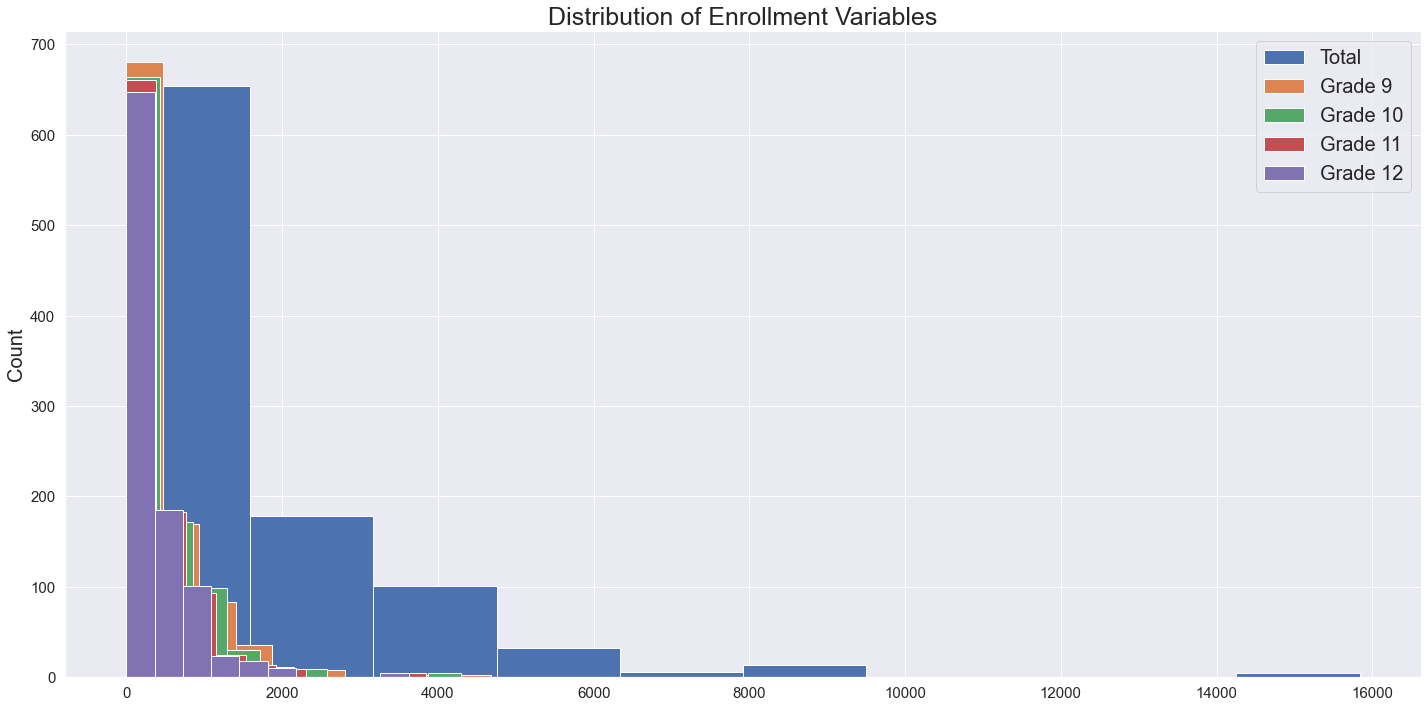

In [11]:
#plotting the distribution of the quantitive variables


sns.set(rc={"figure.figsize":(20,10)})

fig, ax = plt.subplots()
ax.hist(enrollment_with_race["Total"],label = "Total")
ax.hist(enrollment_with_race["GRADE 9"], bins = 10, label = "Grade 9")
ax.hist(enrollment_with_race["GRADE 10"],bins = 10, label = "Grade 10")
ax.hist(enrollment_with_race["GRADE 11"],bins = 10,label = "Grade 11")
ax.hist(enrollment_with_race["GRADE 12"],bins = 10,label = "Grade 12")
ax.set_title("Distribution of Enrollment Variables", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_xlabel("")
ax.set_ylabel("Count", fontsize = 20)
plt.legend(fontsize = 20)
plt.tight_layout()
fig = plt.gcf()
plt.show()
#fig.savefig("distribution of enrollment variables" , dpi = 1200) #save figure in director as png image

In [12]:
# grouping enrollment data in year 2021 by race

enrollment_with_race["year"] = enrollment_with_race["DATE OF REPORT"].dt.year
enrollment_with_race_2 = enrollment_with_race[enrollment_with_race["year"] == 2021]

race = pd.DataFrame(enrollment_with_race_2.groupby("Race")["Total"].sum())

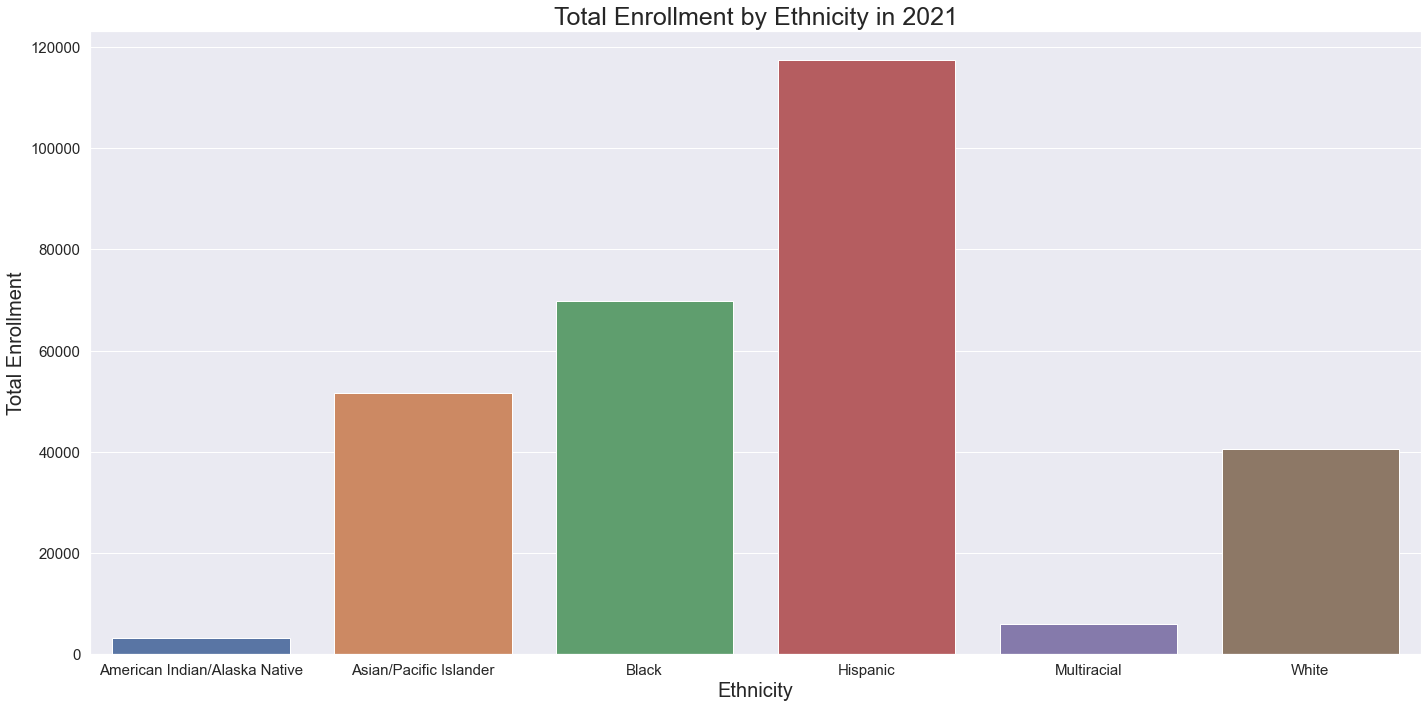

In [13]:
#plotting enrollment vs ethnicity in 2021


sns.set(rc={"figure.figsize":(20,10)})
ax1 = sns.barplot( x = race.index, y = race["Total"]) 
ax1.set_xlabel("Ethnicity" , fontsize = 20)
ax1.set_ylabel("Total Enrollment", fontsize = 20)
ax1.set_title("Total Enrollment by Ethnicity in 2021" , fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
fig = plt.gcf()
plt.show()
#fig.show()
#fig.savefig("total enrollment by ethnicity", dpi=1200)

**Looking At the bar chart above, we can see that in NYC, there are more Hispanics enrolled in public school than any other race. Black students are enrolled the most after Hispanics. Also, we can see that American Indian/Alsaka Native students had the least total enrollment in NYC from 2017 to 2020.**

In [14]:
# calculating the sum of total enrollment in all grade  

sum_columns = enrollment_with_gender["GRADE 9"]+ enrollment_with_gender["GRADE 10"]+enrollment_with_gender["GRADE 11"]+ enrollment_with_gender["GRADE 12"]

enrollment_with_gender["Total"] = sum_columns
enrollment_with_gender["year"] = enrollment_with_gender["DATE OF REPORT"].dt.year
enrollment_with_gender = enrollment_with_gender[enrollment_with_gender["year"] == 2017]

gender = enrollment_with_gender.groupby("SUBGROUP NAME").sum("Total")
gender

,STATE DISTRICT ID,SUBGROUP CODE,PK12 TOTAL,GRADE 9,GRADE 10,GRADE 11,GRADE 12,Total,year
SUBGROUP NAME,,,,,,,,,
Female,10830300330000,66,492844,38267,37044,33475,31943,140729,66561
Male,10830300330000,99,523835,41717,39563,33936,32415,147631,66561


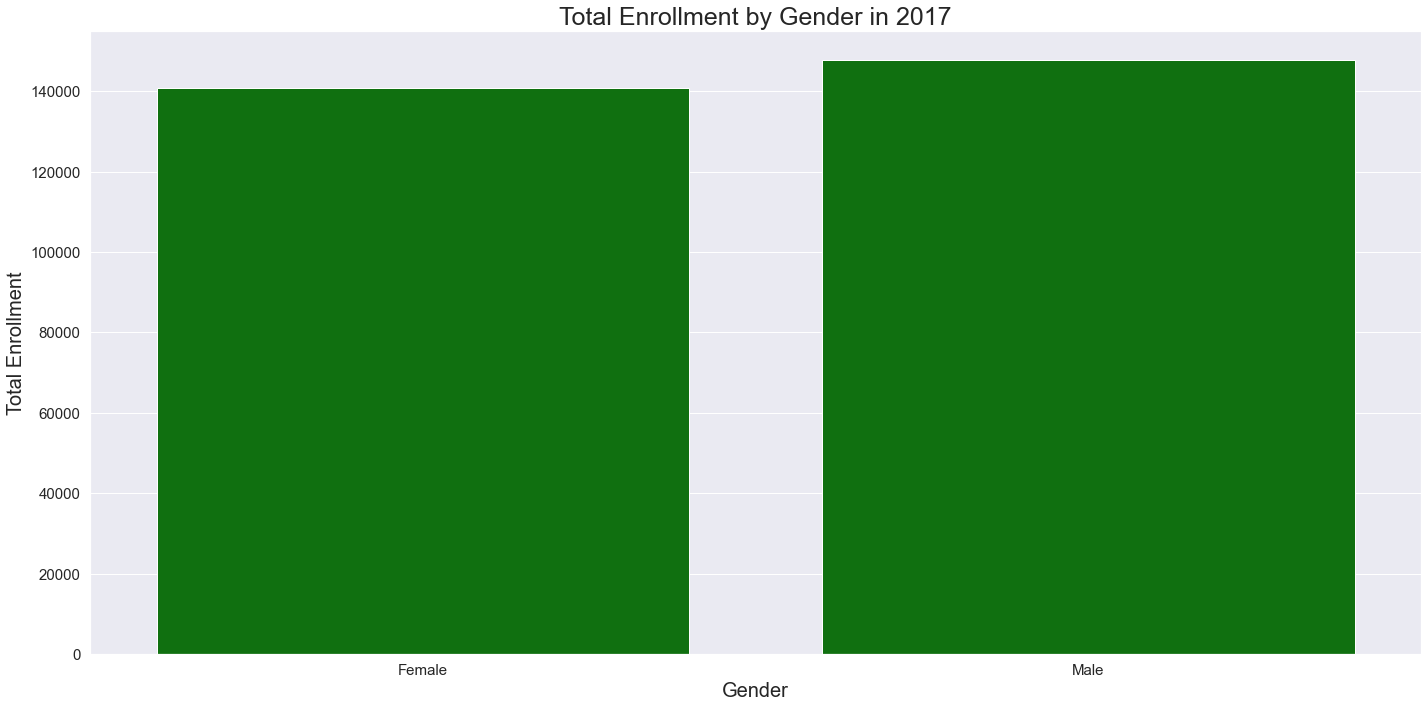

In [15]:
#plotting enrollment vs gender

ax2 = sns.barplot( x = gender.index, y = gender["Total"], color = "green") 
ax2.set_xlabel("Gender", fontsize = 20)
ax2.set_ylabel("Total Enrollment" , fontsize = 20)
ax2.set_title("Total Enrollment by Gender in 2017" , fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
fig = plt.gcf()
plt.show()
#fig.savefig("total enrollment by gender", dpi = 1200)

In [16]:
# calculating the sum of total enrollment in all grade in year 2019

sum_columns = enrollment_with_eco_status["GRADE 9"]+ enrollment_with_eco_status["GRADE 10"]+enrollment_with_eco_status["GRADE 11"]+ enrollment_with_eco_status["GRADE 12"]
enrollment_with_eco_status["Total"] = sum_columns

enrollment_with_eco_status["year"] = enrollment_with_eco_status["DATE OF REPORT"].dt.year

enrollment_with_eco_status = enrollment_with_eco_status[enrollment_with_eco_status["year"] == 2019]

eco = pd.DataFrame(enrollment_with_eco_status.groupby("SUBGROUP NAME")["Total"].sum())

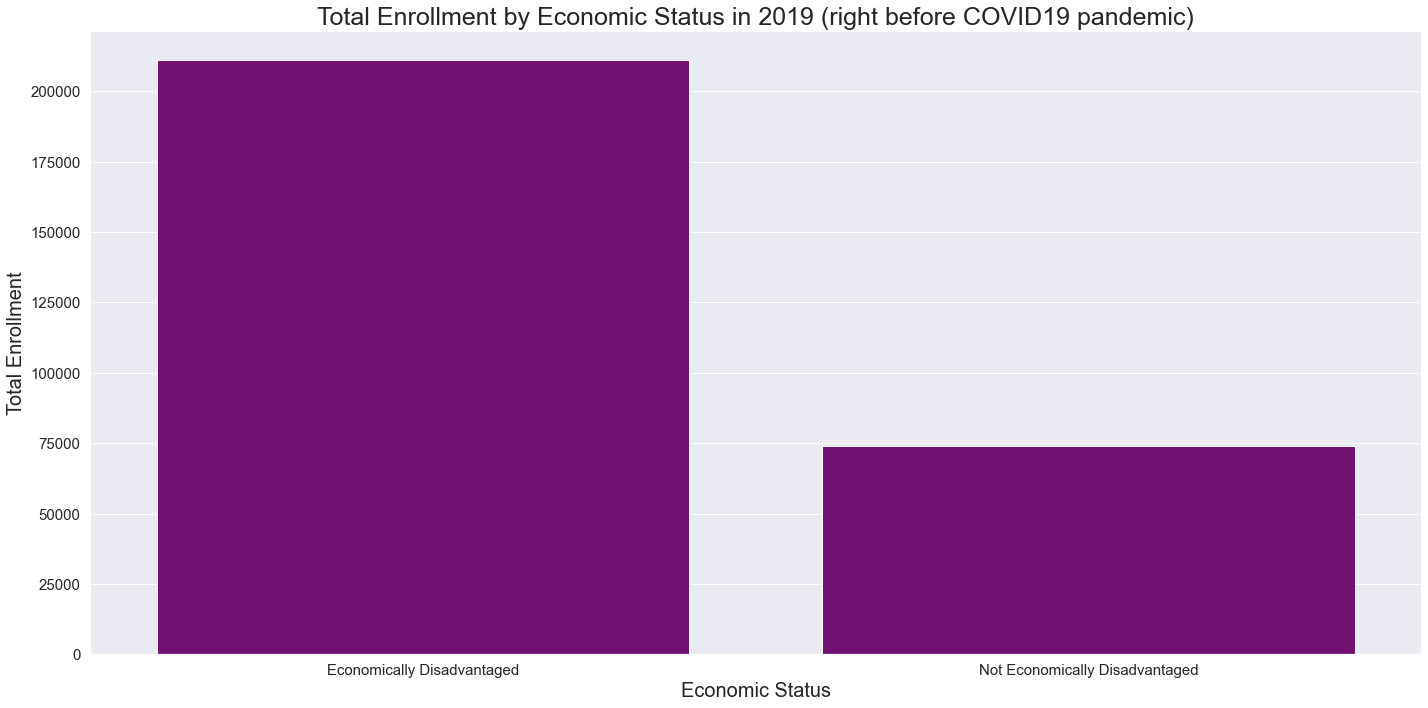

In [17]:
# plotting enrollment vs Economics status in 2019

ax3 = sns.barplot(x = eco.index , y = eco["Total"], color = "purple")
ax3.set_xlabel("Economic Status", fontsize = 20)
ax3.set_ylabel("Total Enrollment", fontsize = 20)
ax3.set_title("Total Enrollment by Economic Status in 2019 (right before COVID19 pandemic)", fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
fig = plt.gcf()
plt.show()
#fig.savefig("total enrollment by economic status", dpi = 1200)

In [18]:
# grouping enrollment numbers of each race by year

enrollment_with_race["year"] = enrollment_with_race["DATE OF REPORT"].dt.year
race_year = pd.DataFrame(enrollment_with_race.groupby("year")["Total"].sum())
race_year

,Total
year,
2017,288360
2018,288004
2019,285019
2020,283361
2021,288602


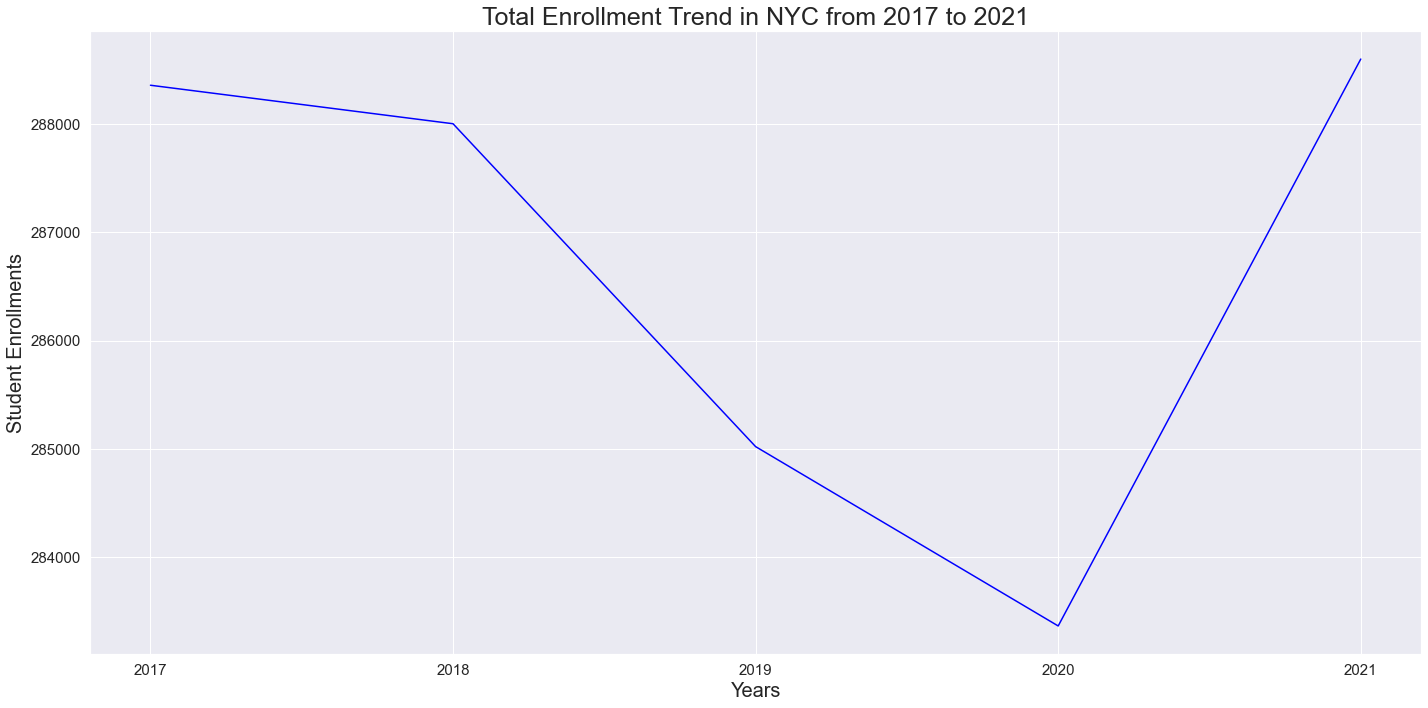

In [19]:
# plotting the trend in total number of enrollment from 2017 - 2021

fig, ax4 = plt.subplots()

ax4.plot(race_year.index, race_year["Total"], color = "blue")
ax4.set_title("Total Enrollment Trend in NYC from 2017 to 2021", fontsize = 25)
ax4.set_xlabel("Years", fontsize = 20)
ax4.set_ylabel("Student Enrollments", fontsize= 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax4.locator_params(integer=True)
plt.tight_layout()
fig = plt.gcf()
plt.show()
#fig.savefig("total enrollment trend", dpi = 1200)

**From previous figure, when we look at the total enrollment trend from 2017 to 2021, we see that overall student enrollment have been decreasing since 2018. What is interesting that the took an upward trajactory after the pandemic.**

In [20]:
a = enrollment_with_race.groupby("year").sum("Total")
a

,STATE DISTRICT ID,SUBGROUP CODE,GRADE 9,GRADE 10,GRADE 11,GRADE 12,Total
year,,,,,,,
2017,64981801980000,1287,79984,76607,67411,64358,288360
2018,64981801980000,1287,79009,76234,66104,66657,288004
2019,64981801980000,1287,79396,75483,66293,63847,285019
2020,64981801980000,1287,79145,74365,65668,64183,283361
2021,64981801980000,1287,76445,75971,68034,68152,288602


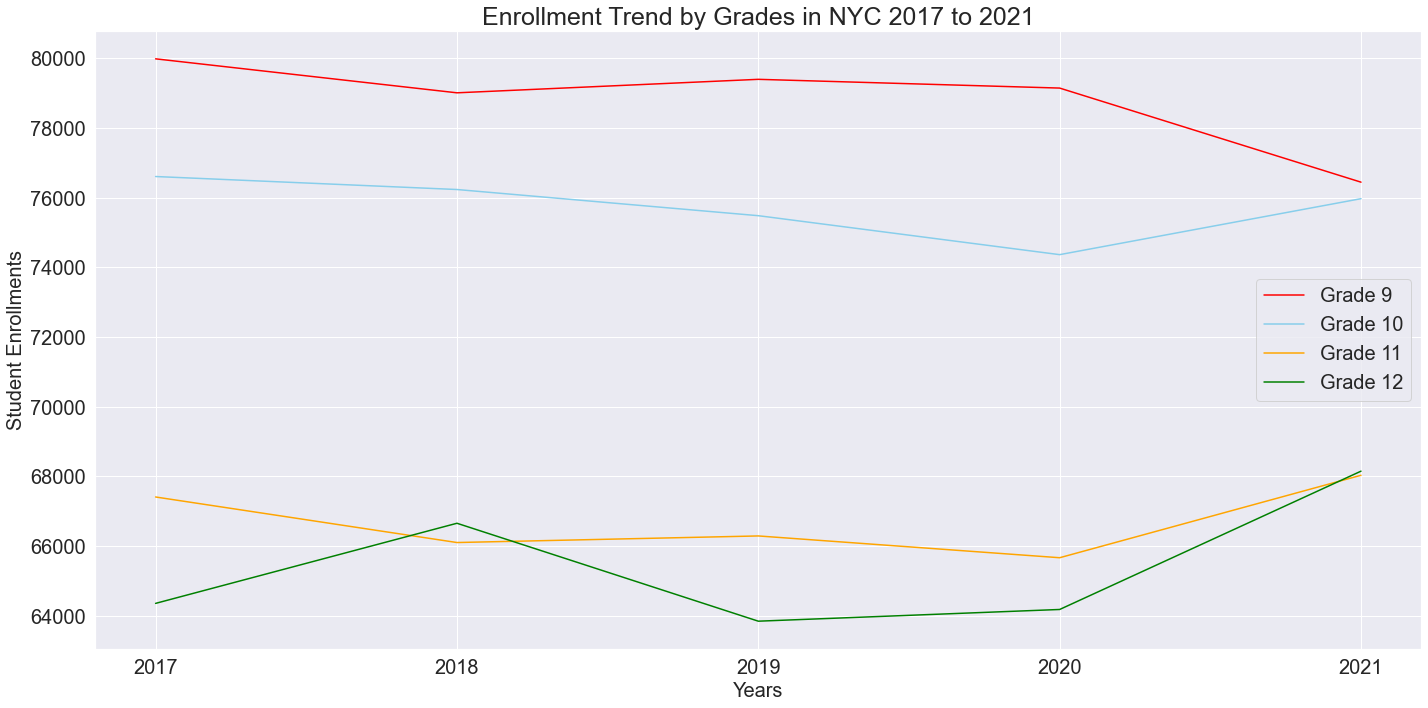

In [21]:
#ploting enrolments trend by grade from 2017 - 2021

fig, ax5 = plt.subplots()
ax5.plot(a.index, a["GRADE 9"], color = "red", label = "Grade 9")

ax5.plot(a.index, a["GRADE 10"], color = "skyblue", label = "Grade 10")

ax5.plot(a.index, a["GRADE 11"], color = "orange", label = "Grade 11")

ax5.plot(a.index, a["GRADE 12"], color = "green", label = "Grade 12")

ax5.set_title("Enrollment Trend by Grades in NYC 2017 to 2021", fontsize = 25)
ax5.set_xlabel("Years", fontsize = 20)
ax5.set_ylabel("Student Enrollments", fontsize = 20)
ax5.legend(fontsize= 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tight_layout()
ax5.locator_params(integer=True)
fig = plt.gcf()
plt.show()
#fig.savefig("enrollment trend by grades", dpi = 1200)